In [1]:
import os
os.chdir('/Users/raymondbaranski/GitHub/HNSC/src')
import numpy as np
import pickle
import torch
import utils
import ant_control
import scipy
from scipy.ndimage import gaussian_filter1d as gfilter
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# from ipywidgets import interact, interactive, fixed, interact_manual
# import ipywidgets as widgets


%matplotlib notebook

In [2]:
model_dir = '/Users/raymondbaranski/GitHub/HNSC/intuition/'
data_path = '/Volumes/ALEX_SSD/HNSC_data/target_20210824-103250.txt'
dataset = utils.load_txt_limit(data_path, 90000)


10000
20000
30000
40000
50000
60000
70000
80000


In [3]:
# disps = np.sqrt(np.sum(dataset['disp_vect'].numpy() ** 2, 1))
# plt.figure()
# plt.hist(disps, 100)

In [4]:
model = ant_control.ForModule.load_model(model_dir, '[-6.0]20210825-161652')
# model = ant_control.ForModule([45, 100, 100, 100, 100, 100, 2])
# model = ant_control.ForModule([45, 100, 100, 100, 100, 100, 100, 100, 2])

non-BatchNorm layer


/anaconda3/lib/python3.6/site-packages/torch/serialization.py:593: SourceChangeWarning: source code of class 'ant_control.ForModule' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


In [5]:
# lr = 1
# loop_counter = 0
# optim = ant_control.Optimizer(model, dataset, lr)
# while loop_counter < 10:
#     model.train()
#     error_hist, rel_error_hist = optim.train(101, 1000)
#     loop_counter += 1
#     model.eval()
#     # model.save_model(model_dir, utils.get_time_stamp())
#     if error_hist[-1] >= error_hist[0]:
#         lr = lr / 2
#         optim = ant_control.Optimizer(model, dataset, lr)
#     print('Learning rate: {}, Error: {}: Iter: {}'.format(lr, error_hist[-1], loop_counter))

lr = 0.01
optim = ant_control.Optimizer(model, dataset, lr)
# REL_ERR = 3
# while REL_ERR > 0.5:
#     model.train()
#     error_hist, rel_error_hist = optim.train(1000, 5000)
#     REL_ERR = rel_error_hist[-1]
#     final_log_error = np.log(error_hist[-1])
#     if error_hist[-1] > error_hist[0]:
#         lr = lr / 2
#         print('LR: {}'.format(lr))
#         optim = ant_control.Optimizer(model, dataset, lr)
# print('done')

In [ ]:
mode.eval()
model.save_model(model_dir, utils.get_time_stamp())

In [ ]:
# plt.semilogy(error_hist)
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(gfilter(error_hist, 1))
plt.title('Error')
plt.subplot(1, 2, 2)
plt.plot(rel_error_hist)
plt.title('Relative Error')
plt.show()

In [32]:
def plot_vect(vect, color):
    vect = vect.detach().numpy()
    # print(vect)
    x = [0, vect[:, 0]]
    y = [0, vect[:, 1]]
    plt.plot(x, y, color=color)
    plt.plot(vect[:, 0], vect[:, 1], 'o', color=color)
    
def get_interesting_sample(optim):
    minibatch, error, rel_error = optim.get_sample()
    # print(minibatch)
    while torch.sqrt(torch.sum(minibatch['disp_vect'].detach() ** 2)) < 0:
        minibatch, error, rel_error = optim.get_sample()
    return minibatch, error, rel_error

def plot_sample(optim, model):
    model.eval()
    minibatch, error, rel_error = optim.get_sample() # get_interesting_sample(optim)
    # print(minibatch)
    print(error, rel_error)
    plt.figure(figsize=(5,5))
    plot_vect(minibatch['disp_vect'], [0, 0, 0])
    plot_vect(minibatch['~disp_vect'], [1, 0, 0])
    xmax = np.max(np.abs(plt.xlim()))
    ymax = np.max(np.abs(plt.ylim()))
    maxlim = np.max([xmax, ymax, .5])
    plt.xlim(-maxlim, maxlim)
    plt.ylim(-maxlim, maxlim)
    plt.show()

0.00019941217033192515 0.21745512


<IPython.core.display.Javascript object>


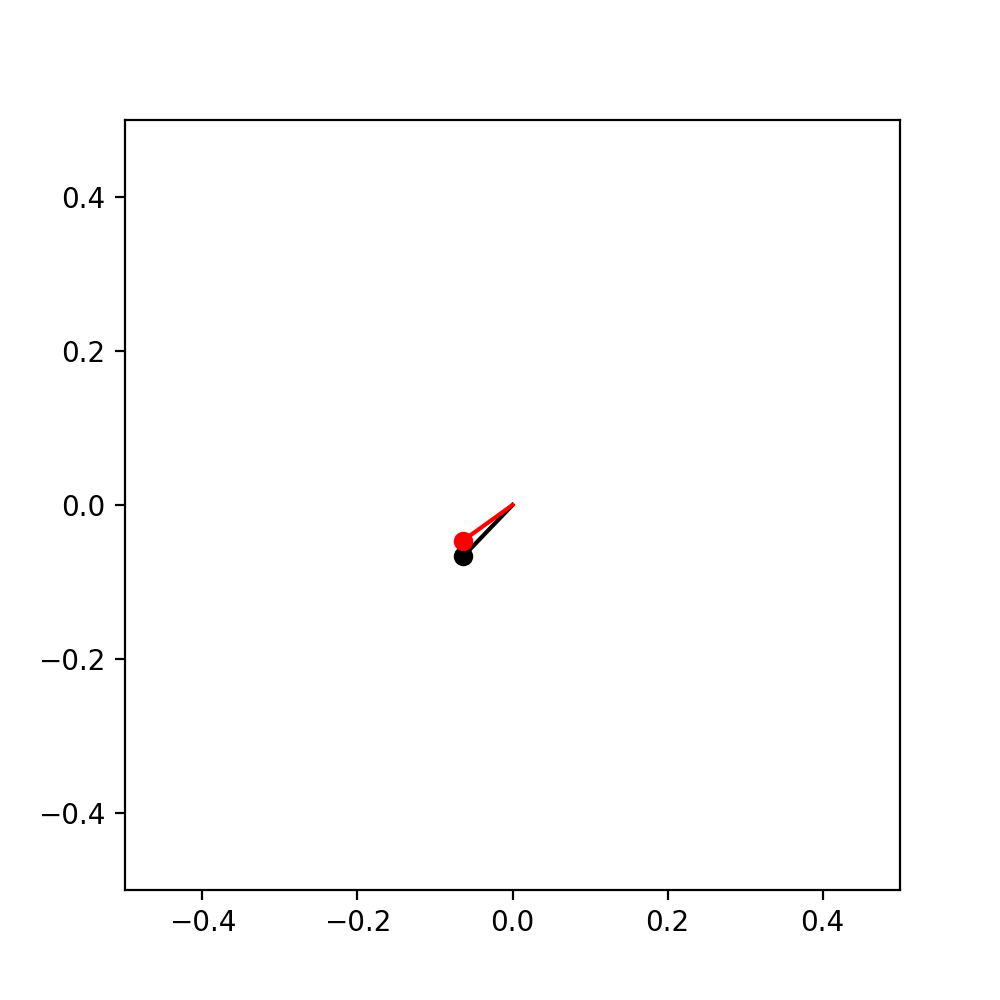

In [65]:
plot_sample(optim, model)